https://velog.io/@dltjrdud37/CNNVGGNet-Tensorflow%EB%A1%9C-%EC%8B%A4%EC%8A%B5 <BR>
https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **데이터셋 구성**

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/content/drive/MyDrive/1-0. 서강대/1. 텐서플로우 활용 기초 팀플 (3팀)/데이터/피부질환 데이터셋 final"
train_dir = base_dir + "/train"
test_dir =  base_dir + "/test"
val_dir =  base_dir + "/val"

train_data = image_dataset_from_directory(train_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                          shuffle = True,seed = 42)
test_data = image_dataset_from_directory(test_dir,label_mode = "categorical",
                                         image_size = (224,224),batch_size = 32,
                                         shuffle = False,seed = 42)
val_data = image_dataset_from_directory(val_dir,label_mode = "categorical",
                                        image_size = (224,224),batch_size = 32,
                                        shuffle = False,seed = 42)

Found 19594 files belonging to 10 classes.
Found 2622 files belonging to 10 classes.
Found 3915 files belonging to 10 classes.


# **Modeling**

## Parameters

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 10
LEARNING_RATE = 0.001
EPOCHS = 30

## Model

In [ ]:
import tensorflow as tf 
from keras import layers

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
base_model = tf.keras.applications.EfficientNetB5(include_top = False, input_shape=IMG_SHAPE,)
base_model.trainable = False

x = base_model.output
x = layers.GlobalAvgPool2D(name = "pooling_layer")(x)
x = layers.Dense(32,activation = "relu",kernel_initializer = tf.keras.initializers.he_normal())(x)
x = layers.Dense(NUM_CLASSES)(x)
outputs = layers.Activation("softmax",dtype = tf.float32)(x)
model = tf.keras.Model(base_model.input, outputs)

115263384/115263384 [==============================] - 6s 0us/step


In [ ]:
adam = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 lization)                      )                                                                 
                                                                                                  
 block1c_drop (Dropout)         (None, 112, 112, 24  0           ['block1c_project_bn[0][0]']     
                                )                                                                 
                                                                                                  
 block1c_add (Add)              (None, 112, 112, 24  0           ['block1c_drop[0][0]',           
                                )                                 'block1b_add[0][0]']            
                                                                                                  
 block2a_expand_conv (Conv2D)   (None, 112, 112, 14  3456        ['block1c_add[0][0]']            
                                4)                                                                
          

## Train

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

history = model.fit(train_data, validation_data=val_data,
                    epochs=EPOCHS, verbose=1, 
                    callbacks=[earlystopping]
                    )

Epoch 1/30
613/613 [==============================] - 3675s 6s/step - loss: 0.8475 - accuracy: 0.6783 - val_loss: 0.7053 - val_accuracy: 0.7298
Epoch 2/30
613/613 [==============================] - 159s 257ms/step - loss: 0.6474 - accuracy: 0.7547 - val_loss: 0.6660 - val_accuracy: 0.7448
Epoch 3/30
613/613 [==============================] - 158s 257ms/step - loss: 0.5761 - accuracy: 0.7825 - val_loss: 0.6220 - val_accuracy: 0.7670
Epoch 4/30
613/613 [==============================] - 158s 257ms/step - loss: 0.5332 - accuracy: 0.8011 - val_loss: 0.6150 - val_accuracy: 0.7711
Epoch 5/30
613/613 [==============================] - 158s 257ms/step - loss: 0.4929 - accuracy: 0.8175 - val_loss: 0.5894 - val_accuracy: 0.7872
Epoch 6/30
613/613 [==============================] - 158s 257ms/step - loss: 0.4655 - accuracy: 0.8269 - val_loss: 0.5876 - val_accuracy: 0.7826
Epoch 7/30
613/613 [==============================] - 158s 257ms/step - loss: 0.4377 - accuracy: 0.8406 - val_loss: 0.5922 - v

## history

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def learning_curve(history, epoch):
  plt.figure(figsize = (15,5))
  epoch_range = np.arange(1, epoch + 1)

  plt.subplot(1, 2, 1)

  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Val'])

  plt.subplot(1,2,2)

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Train', 'Val'])
  plt.show()

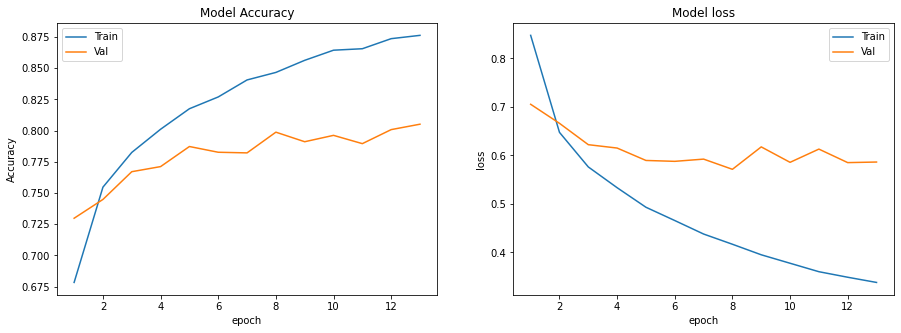

In [ ]:
learning_curve(history, 13)

In [ ]:
model.save('/content/drive/MyDrive/1-1. 피부 질환 분류/Skin_disease_EfficientNet.h5')

# **성능 평가**

In [ ]:
val_accuracy = model.evaluate(val_data)
test_accuracy = model.evaluate(test_data)

print("val_accuracy : {}%".format(round(val_accuracy[1]*100,4)))
print("test_accuracy : {}%".format(round(test_accuracy[1]*100,4)))

82/82 [==============================] - 400s 5s/step - loss: 0.5757 - accuracy: 0.8021
val_accuracy : 80.5109%
test_accuracy : 80.2059%


# **예측**

In [ ]:
pred = model.predict(test_data)

82/82 [==============================] - 20s 211ms/step


In [ ]:
class_names = train_data.class_names
print("전체 클래스 이름")
display(class_names)

pred_classes = pred.argmax(axis =1)
print("예측 결과:", pred_classes[0])
print("예측 결과 라벨값:", class_names[pred_classes[0]])

전체 클래스 이름


['1. Eczema(습진)',
 '10. Warts Molluscum(사마귀 및 바이러스 감염)',
 '2. Melanoma(흑색종)',
 '3. Atopic Dermatitis(아토피 피부염)',
 '4. Basal Cell Carcinoma(기저 세포 암)',
 '5. Melanocytic Nevi (멜라닌 세포 모반)',
 '6. Benign Keratosis-like Lesions(양성 각화증 유사 병변)',
 '7. normal(정상)',
 '8. Seborrheic Keratoses and other Benign Tumors(지루성 각화증 및 기타 양성 종양)',
 '9. Tinea Ringworm Candidiasis(백선 칸디다증 및 기타 곰팡이 감염)']

예측 결과: 3
예측 결과 라벨값: 3. Atopic Dermatitis(아토피 피부염)


In [ ]:
y_labels = []
for image,label in test_data.unbatch():
    y_labels.append(label.numpy().argmax())
y_labels[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import classification_report
print("Classification report\n",classification_report(y_labels,pred_classes))

Classification report
               precision    recall  f1-score   support

           0       0.56      0.69      0.62       169
           1       0.75      0.59      0.66       211
           2       0.90      0.94      0.92       314
           3       0.53      0.66      0.59       127
           4       0.79      0.92      0.85       335
           5       0.93      0.92      0.92       798
           6       0.77      0.54      0.63       209
           7       1.00      1.00      1.00       103
           8       0.63      0.67      0.65       185
           9       0.74      0.57      0.64       171

    accuracy                           0.80      2622
   macro avg       0.76      0.75      0.75      2622
weighted avg       0.81      0.80      0.80      2622



In [ ]:
classification_dict = classification_report(y_labels,pred_classes,output_dict = True)

In [ ]:
classification_f1_scores = {}
for k,v in classification_dict.items():
    if k == "accuracy":
        break
    else:
        classification_f1_scores[class_names[int(k)]] = v["f1-score"]
classification_f1_scores

{'1. Eczema(습진)': 0.6186666666666666,
 '10. Warts Molluscum(사마귀 및 바이러스 감염)': 0.6631299734748011,
 '2. Melanoma(흑색종)': 0.9175738724727839,
 '3. Atopic Dermatitis(아토피 피부염)': 0.5894736842105264,
 '4. Basal Cell Carcinoma(기저 세포 암)': 0.8535911602209945,
 '5. Melanocytic Nevi (멜라닌 세포 모반)': 0.9240426867545511,
 '6. Benign Keratosis-like Lesions(양성 각화증 유사 병변)': 0.6348314606741574,
 '7. normal(정상)': 1.0,
 '8. Seborrheic Keratoses and other Benign Tumors(지루성 각화증 및 기타 양성 종양)': 0.6509186351706037,
 '9. Tinea Ringworm Candidiasis(백선 칸디다증 및 기타 곰팡이 감염)': 0.6447368421052632}

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=tf.keras.utils.load_img(path, target_size=(224, 224))

  x=tf.keras.utils.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

Saving ISIC_0073071.jpg to ISIC_0073071.jpg
1/1 [==============================] - 0s 35ms/step


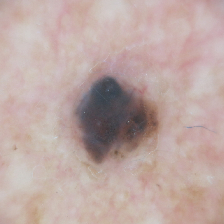

In [ ]:
img

In [ ]:
print(classes.argmax())
print("예측 결과 라벨값:", class_names[classes.argmax()])

4
예측 결과 라벨값: 4. Basal Cell Carcinoma(기저 세포 암)
